# Drivers

In [10]:
import numpy as np
%matplotlib inline

In [ ]:
# uncomment to update plot during optimization
# %matplotlib qt 

In [ ]:
import matplotlib.pyplot as plt

In [11]:
from topfarm.cost_models.dummy import DummyCost
from topfarm.plotting import NoPlot
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm._topfarm import TopFarmProblem
from topfarm.cost_models.cost_model_wrappers import IncomeModelComponent
from topfarm.cost_models.dummy import DummyCostPlotComp


        


initial = np.array([[6, 0, 0], [6, -8, 0], [1, 1, 0]])  # initial turbine layouts
optimal = np.array([[2.5, -3, 1], [6, -7, 2], [4.5, -3, 3]])  # optimal turbine layouts
boundary = np.array([(0, 0), (6, 0), (6, -10), (0, -10)])  # turbine boundaries
desired = np.array([[3, -3, 1], [7, -7, 2], [4, -3, 4]])  # desired turbine layouts

plot_comp = DummyCostPlotComp(desired, delay=.1, plot_improvements_only=True)

In [12]:
def optimize(driver):
    tf = TopFarmProblem(
            dict(zip('xy', (initial[:, :2]).T)),
            DummyCost(desired[:, :2]),
            constraints=[SpacingConstraint(2),
                         XYBoundaryConstraint(boundary)],
            driver=driver,
            plot_comp=plot_comp)
    tf.optimize()
    

## DOE (Design Of Experiment) Driver

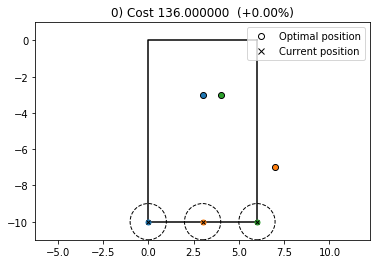

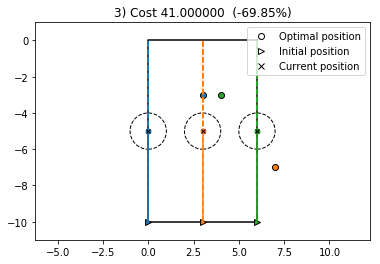

In [13]:
from openmdao.drivers.doe_generators import ListGenerator
from openmdao.drivers.doe_driver import DOEDriver

optimize(DOEDriver(ListGenerator([[('x', [0., 3., 6.]), ('y', [-10., -10., -10.])],
                                  [('x', [0., 3., 6.]), ('y', [-5., -5., -5.])],
                                  [('x', [0., 3., 6.]), ('y', [-0., -0., -0.])],
                                  ])))

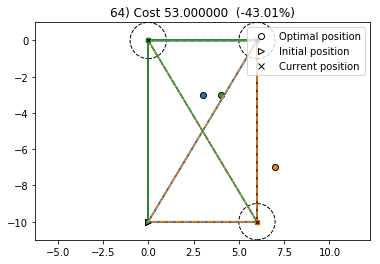

In [14]:
from openmdao.drivers.doe_generators import FullFactorialGenerator, ListGenerator
from openmdao.drivers.doe_driver import DOEDriver

optimize(DOEDriver(FullFactorialGenerator(2)))

## ScipyOptimizeDriver

- SLSQP: Gradient based driver
- Cobyla

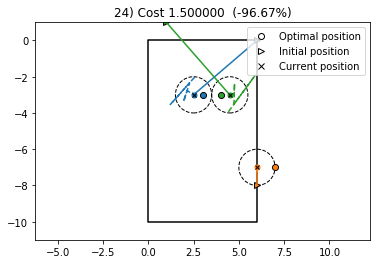

In [15]:
from topfarm.easy_drivers import EasyScipyOptimizeDriver
optimize(EasyScipyOptimizeDriver(optimizer='SLSQP', maxiter=200, tol=1e-6, disp=False))

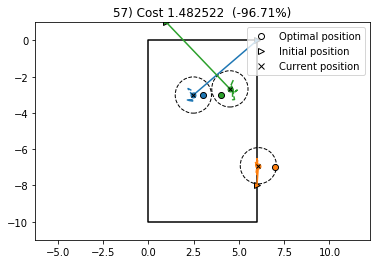

In [16]:
from topfarm.easy_drivers import EasyScipyOptimizeDriver
optimize(EasyScipyOptimizeDriver(optimizer='COBYLA', maxiter=200, tol=1e-6, disp=False))

## Genetic algorithm driver

Generation  0
Generation  1
Generation  2
Generation  3
Generation  4
Generation  5


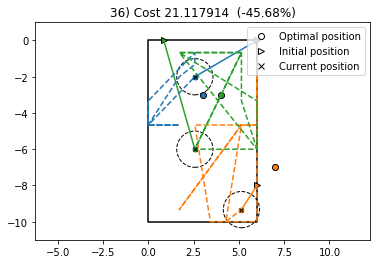

In [17]:
from topfarm.drivers.random_search_driver import RandomizeTurbinePosition_Circle
from topfarm.easy_drivers import EasySimpleGADriver
optimize(EasySimpleGADriver(max_gen=5, pop_size=5, Pm=None, Pc=.5, elitism=True, bits={}))
    

## Random search driver

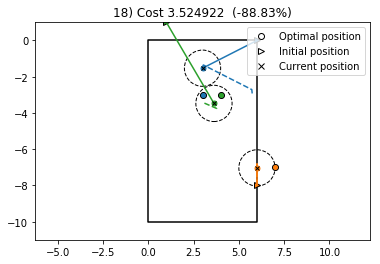

In [18]:
from topfarm.drivers.random_search_driver import RandomizeTurbinePosition_Circle
from topfarm.easy_drivers import EasyRandomSearchDriver

optimize(EasyRandomSearchDriver(
    randomize_func=RandomizeTurbinePosition_Circle(max_step=5), 
    max_iter=100, 
    max_time=10, 
    disp=False))